# Script File for Final Online Assessment (FOA) Submission
## BACS3013 Data Science

### Academic Year 2021/2022  
### December Examination

It is an open-book e-assessment. You are allowed to refer to any practical notes/use cases/GitHub/Stack Overflow etc. Anyhow, you **MUST NOT** receive any help whatsoever from any other person. If you need any clarification, please directly ask the lecturer(s)-in-charge.

### Please insert your details below:
    
1) Double click the cell below


2) Type your name and student id


3) press CTRL + Enter

#### Name: Ling Li Ya
#### Student ID: 19WMR11673

### Step 1: Put the last three digits of your student id as the my_state_number

eg: if your id is 1902589

You should then write


my_state_number = 673

In [43]:
# Replace 589 with the last three digits of your student id
# and then press CTRL + Enter
my_state_number = 673

### Step 2: Read the insurance_dataset.csv

In [44]:
import pandas as pd
data = pd.read_csv("insurance_dataset.csv")

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Class
0,167647,Male,22,1,7,1,< 1 Year,No,2630,152,0
1,17163,Male,42,1,28,0,1-2 Year,Yes,43327,26,0
2,32023,Female,66,1,33,0,1-2 Year,Yes,35841,124,0
3,87447,Female,22,1,33,0,< 1 Year,No,27645,152,0
4,501933,Male,28,1,46,1,< 1 Year,No,29023,152,0


### Step 3: Sample the data randomly the data and save the dataframe as myData

In [45]:
myData = data.sample(frac =.90, replace = False, random_state = my_state_number)
myData.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Class
110688,443895,Female,41,1,28,1,1-2 Year,No,48034,26,0
345988,403072,Male,25,1,15,1,< 1 Year,No,43901,152,0
209585,455581,Male,26,1,29,1,< 1 Year,No,26479,152,0
71693,197354,Female,25,1,21,1,< 1 Year,No,30846,152,0
186827,200148,Female,25,1,41,0,< 1 Year,Yes,37267,152,1


### Step 4: Start the Analytics using **myData** dataframe as the raw data
Note: Your *myData* dataframe may be different from other students' *myData* dataframe

# Import Dependencies

Importing all libraries to be used. This project will follow the CRISP-DM standard.

In [88]:
# start your codes

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import warnings

# Import data processors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Import miscellaneous
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC

# Import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [47]:
# Filter warnings

warnings.filterwarnings('ignore')

# Business Understanding

The business objective of this project comes from an insurance company that is seeking to provide vehicle insurance to its customers. The company wants to build a model to **predict whether its customers are interested in purchasing vehicle insurance** so that its business models and revenue can be optimised. This is a classification problem as the model needs to predict whether the customer falls in the class of interested or not interested. It has provided an insurance dataset.

# Data Understanding

Understanding more about the dataset.

## Data Shape

In [48]:
myData.shape

(343939, 11)

The dataset contains 343939 rows of data and 11 columns of data.

## Data Information

In [49]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343939 entries, 110688 to 201511
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    343939 non-null  int64 
 1   Gender                343939 non-null  object
 2   Age                   343939 non-null  int64 
 3   Driving_License       343939 non-null  int64 
 4   Region_Code           343939 non-null  int64 
 5   Previously_Insured    343939 non-null  int64 
 6   Vehicle_Age           343939 non-null  object
 7   Vehicle_Damage        343939 non-null  object
 8   Annual_Premium        343939 non-null  int64 
 9   Policy_Sales_Channel  343939 non-null  int64 
 10  Class                 343939 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 31.5+ MB


As seen above, there are 10 features in total and 1 target variable `Class`. 8 of the columns are of `int64` type except for `Gender`, `Vehicle_Age` and `Vehicle_Damage` that are of the `object` type. This means that data encoding will be required. It can be known that the dataset does not have any missing values as all columns show a count of 343939.

## Nature of Data

In [50]:
myData.head(n=10) # First ten rows

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Class
110688,443895,Female,41,1,28,1,1-2 Year,No,48034,26,0
345988,403072,Male,25,1,15,1,< 1 Year,No,43901,152,0
209585,455581,Male,26,1,29,1,< 1 Year,No,26479,152,0
71693,197354,Female,25,1,21,1,< 1 Year,No,30846,152,0
186827,200148,Female,25,1,41,0,< 1 Year,Yes,37267,152,1
195331,186692,Female,38,1,28,0,1-2 Year,Yes,41403,26,0
273733,94547,Male,24,1,29,1,< 1 Year,No,34647,152,0
252641,451537,Male,47,1,8,0,1-2 Year,Yes,40485,26,1
223199,4502,Male,44,1,25,1,1-2 Year,No,2630,124,0
168308,360846,Male,26,1,18,0,1-2 Year,Yes,2630,157,0


In [51]:
myData.tail(n=10) # Last ten rows

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Class
329934,372445,Male,62,0,28,0,1-2 Year,Yes,49354,26,0
321536,9354,Male,25,1,30,0,< 1 Year,Yes,30914,152,0
152073,326497,Female,22,1,12,1,< 1 Year,No,36858,152,0
243087,287467,Female,41,1,28,0,1-2 Year,Yes,34938,26,0
366143,101419,Male,43,1,43,0,1-2 Year,Yes,36639,124,0
95808,95372,Male,48,1,28,0,1-2 Year,Yes,2630,157,0
359198,159910,Female,44,1,30,0,1-2 Year,Yes,21679,124,0
152600,46401,Male,33,1,38,0,1-2 Year,Yes,30811,26,0
368483,173024,Male,20,1,39,0,< 1 Year,Yes,2630,160,0
201511,36183,Male,50,1,8,1,1-2 Year,No,55830,26,0


From the tables above, it is known that `id` is the customer insurance ID. `Gender`, `Driving_License`, `Region_Code`, `Previously_Insured`, `Vehicle_Age`, `Vehicle_Damage`, `Policy_Sales_Channel` and `Class` are all categorical variables (some are nominal and some are ordinal), whereas the `Annual_Premium` is a numerical variable. Other than that, `Driving_License`, `Previously_Insured`, `Vehicle_Damage` and `Class` are binary variables.

In [52]:
# Drop ID
myNewData = myData.drop(columns='id')

# Separate different data
cat_data = (myNewData.drop(columns='Annual_Premium')).columns.values
num_data = (myNewData[['Annual_Premium']]).columns.values

In [53]:
print('Categorical:', cat_data)
print('Numerical:', num_data)

Categorical: ['Gender' 'Age' 'Driving_License' 'Region_Code' 'Previously_Insured'
 'Vehicle_Age' 'Vehicle_Damage' 'Policy_Sales_Channel' 'Class']
Numerical: ['Annual_Premium']


The `id` is dropped before any data analysis is conducted because it is just a random number assigned to each customer and does not offer any real meaning. The remaining columns are separated into two groups.

## Data Description

In [54]:
myNewData.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Class
count,343939.000000,343939.000000,343939.000000,343939.000000,343939.000000,343939.000000,343939.000000
mean,38.545201,0.998148,26.409323,0.488822,30709.409381,111.958865,0.163924
std,15.227192,0.042996,13.180893,0.499876,17047.113579,54.275860,0.370208
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31693.000000,145.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39442.500000,152.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,1.000000


# Data Exploration

The statistics above describe the dataset. It can be known the values of the dataset are spread across a large range. For example, `Annual_Premium` has a range of 2630 to 540165, but `Driving_License` has a range of only 0-1. The range is too different and might affect certain models such as KNN. These data values need to be scaled for better model accuracy.

## Data Distribution

Exploring the dataset's general distribution pattern.

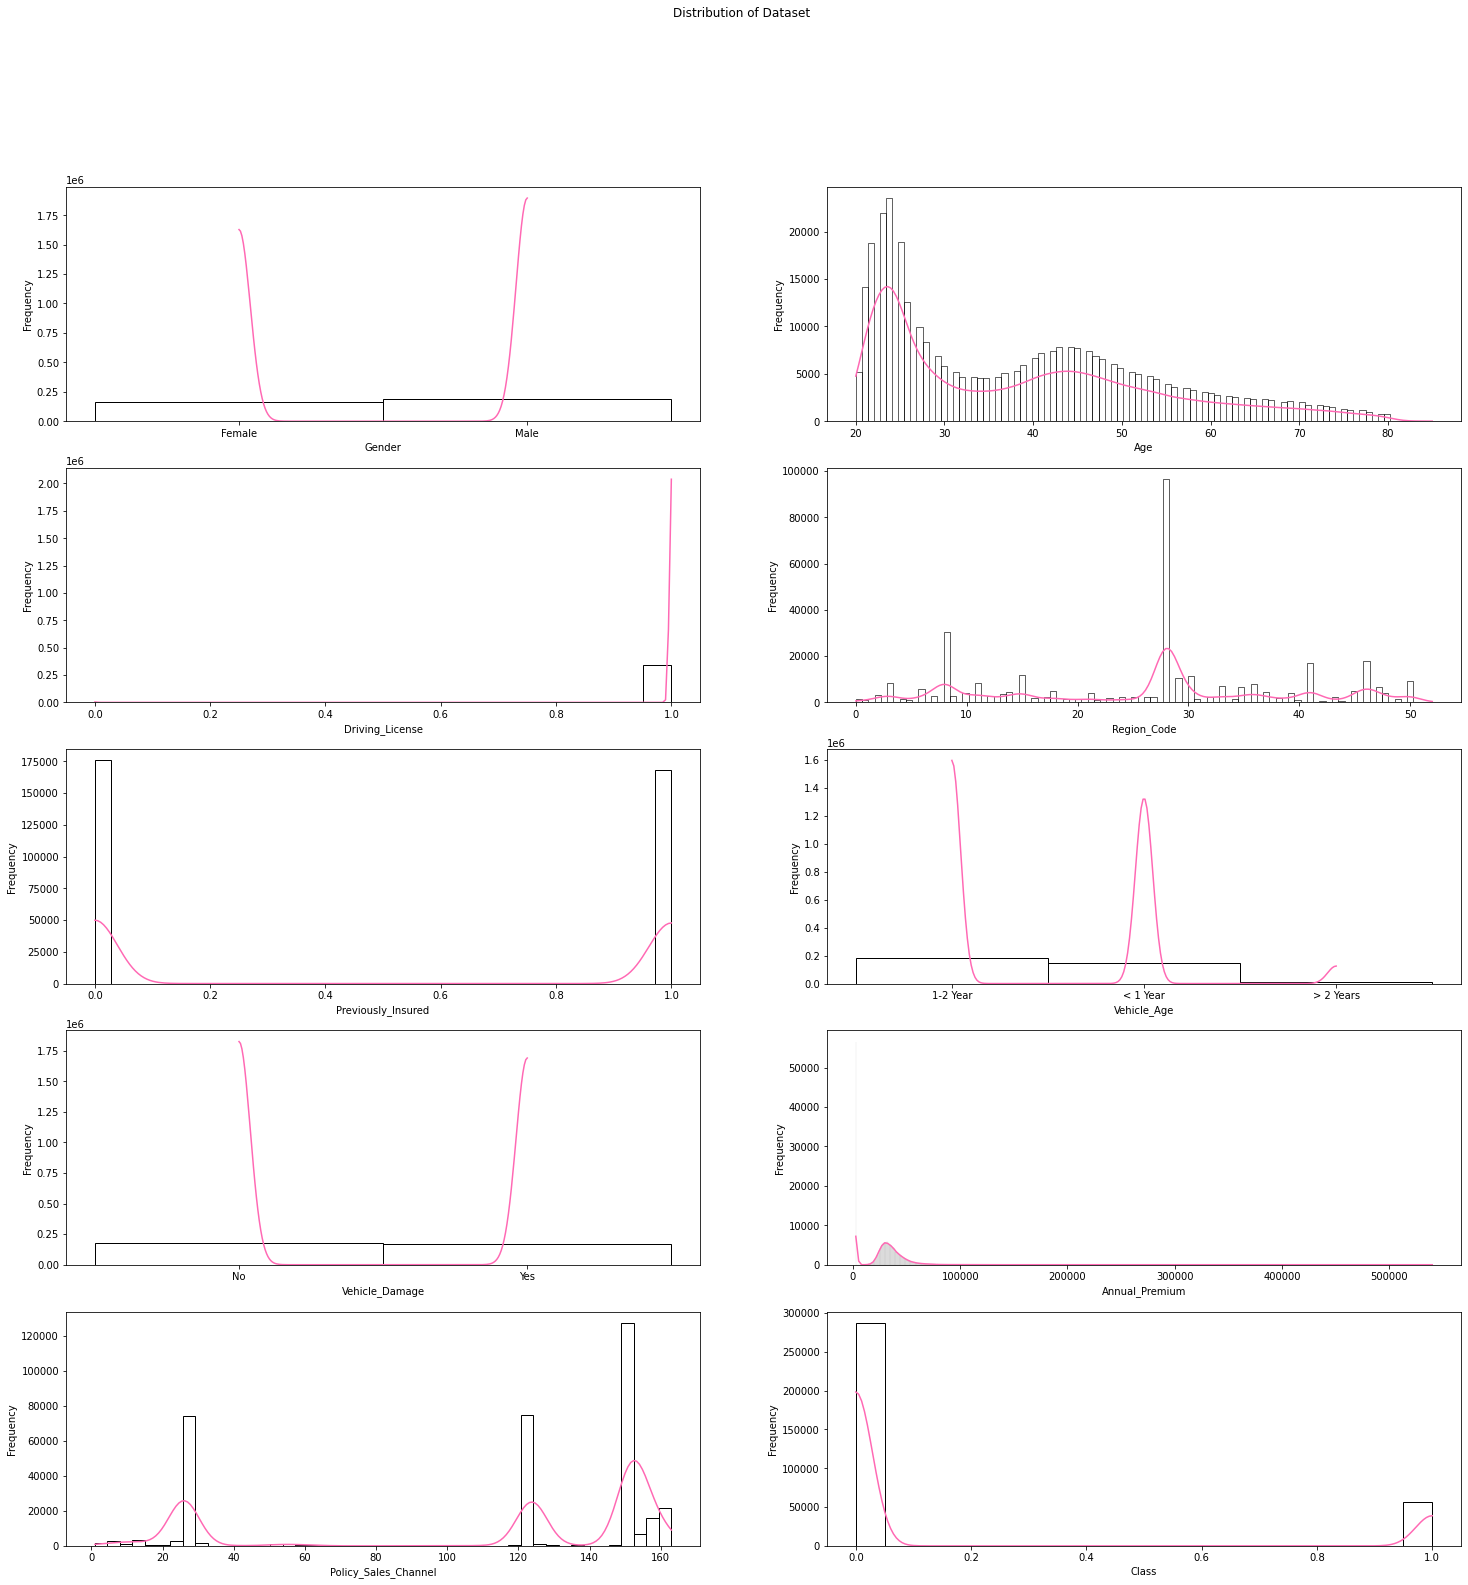

In [55]:
# Get all column values
cols = list(myNewData.columns.values)

# Plot graph
fig, ax = plt.subplots(5, 2, figsize=(25,25))
fig.suptitle('Distribution of Dataset')

ax = ax.flatten() # ax is flattened from a 2D array to a 1D array

for i in range(len(cols)):
    sns.histplot(data=myNewData, ax=ax[i], x=cols[i], kde=True, color='hotpink', alpha=0)
    ax[i].set(xlabel=cols[i], ylabel='Frequency')

As shown from the graph above:

1. There are about the same number of female and male insurance customers. The gender distribution is about equal, with male customers slightly higher than female applicants.
2. Most insurance customers are around 20-30 years old. The `Age` variable follows a right-skewed bell distribution curve.
3. Most, if not nearly all, of the insurance customers have a driving license.
4. Most of the insurance customers come from the region with a code around 28.
5. There are slightly more customers who have not been previously insured.
6. Most customers own a vehicle of age between 1-2 years, closely followed by lesser than 1 year.
7. Almost the same number of customers has either experienced or did not experience vehicle damage before.
8. Most customers pay an annual premium between 2600 to 1000000.
9. Most of the customers come from a policy sales channel of around 150, around 30 and around 120.
10. Around 9/10 of the customers are not interested in a vehicle insurance.

### Categorical Data Analysis

Analysing categorical variables. Exploring the relationships between the features and the target variable (`Class`).

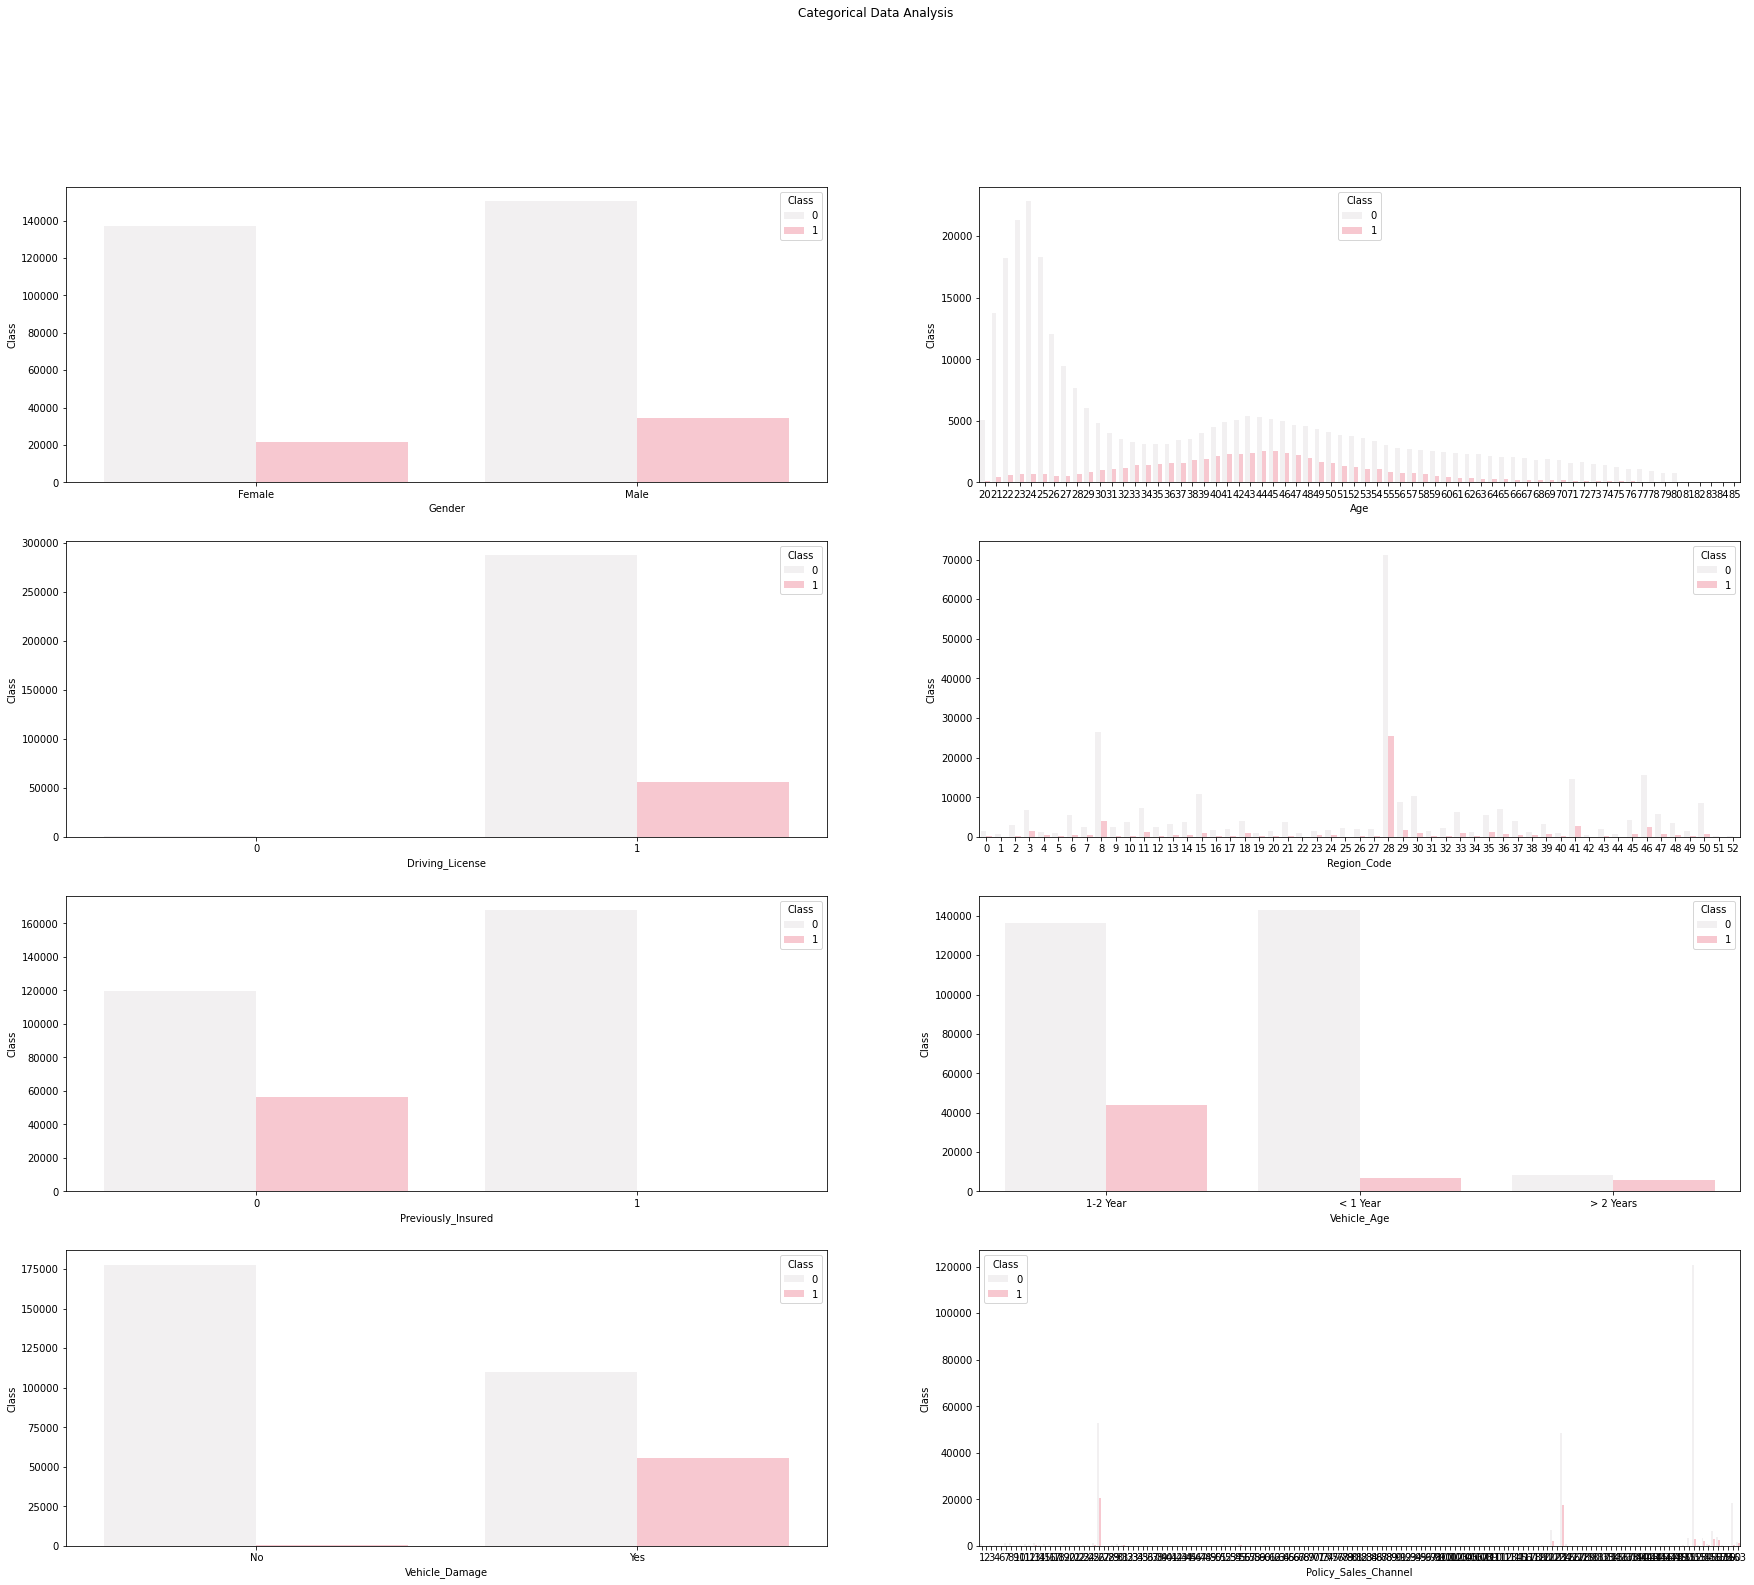

In [56]:
fig, ax = plt.subplots(4, 2, figsize=(30,25))
fig.suptitle('Categorical Data Analysis')

ax = ax.flatten()

for i, v in enumerate(cat_data):
    if(v == 'Class'):
        continue
    sns.countplot(data=myNewData, ax=ax[i], x=v, hue='Class', color='pink', alpha=1)
    ax[i].set(xlabel=v, ylabel='Class')

[Text(0.5, 0, 'Policy_Sales_Channel'), Text(0, 0.5, 'Class')]

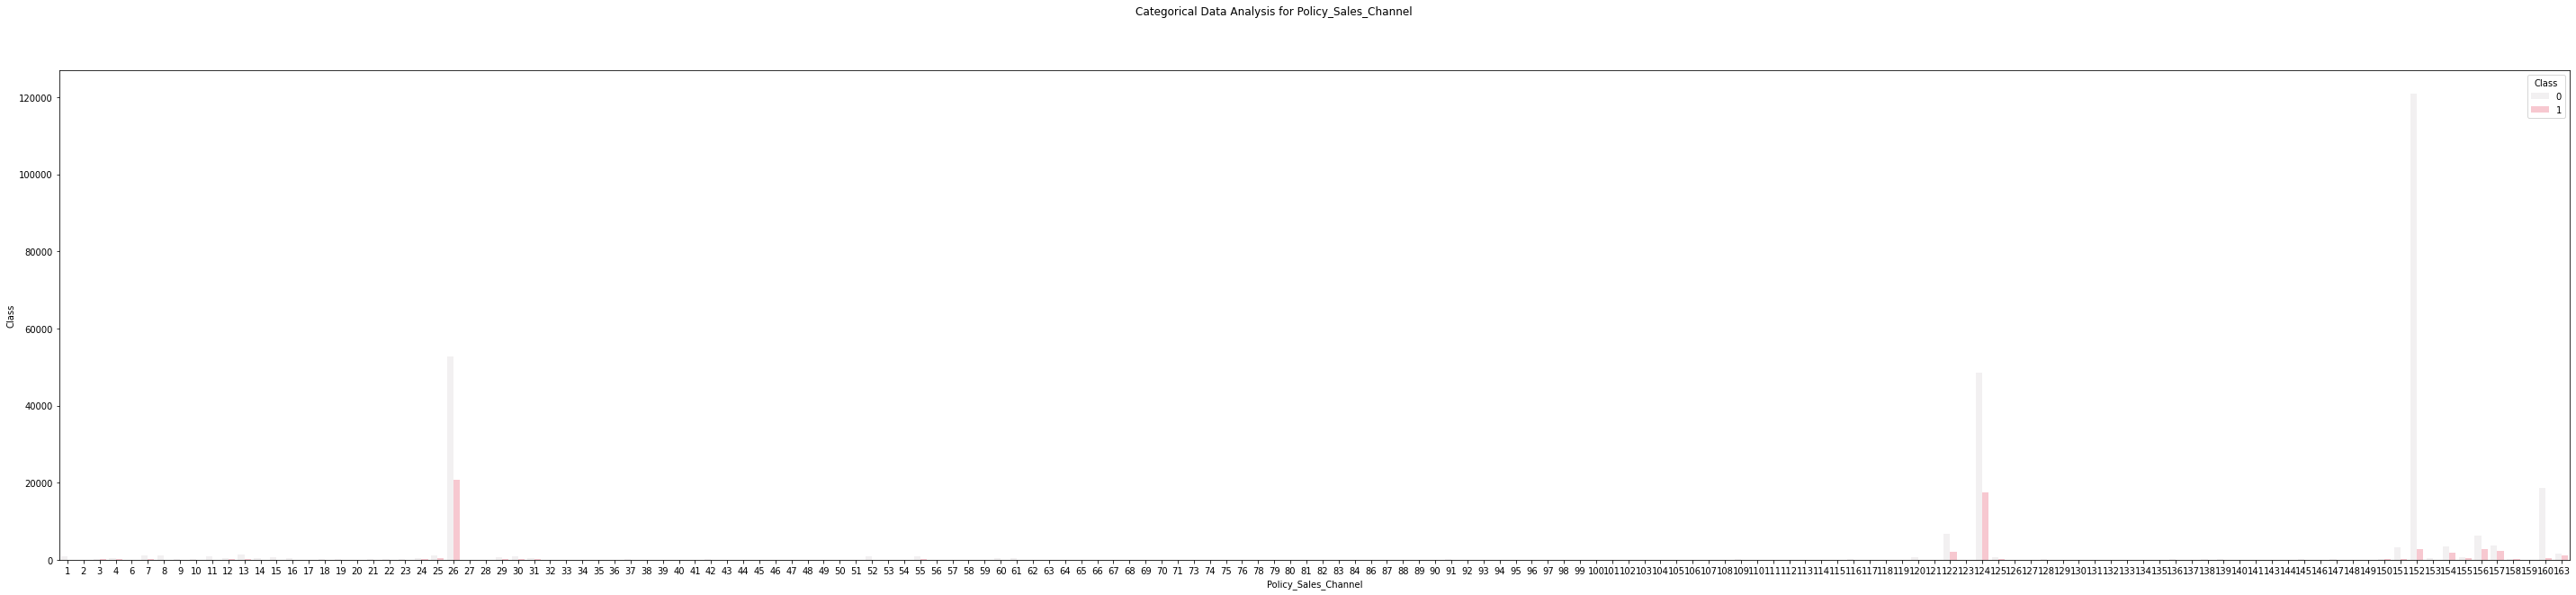

In [57]:
# Can't see clearly so replot
fig, ax = plt.subplots(1, 1, figsize=(50,10))
fig.suptitle('Categorical Data Analysis for Policy_Sales_Channel')

sns.countplot(data=myNewData, ax=ax, x='Policy_Sales_Channel', hue='Class', color='pink', alpha=1)
ax.set(xlabel='Policy_Sales_Channel', ylabel='Class')

From the graphs above, it is known that

1. Around 140000 female and 140000 male customers are not interested in vehicle insurance. Generally, the effects of gender are not obvious.
2. Almost half of the customers aged between 40 - 50 generally are interested in vehicle insurance. It could be due to customers of other age groups might not have a car, especially for people aged between 20 - 30. Perhaps people older than 70 no longer use a car due to health and safety reasons.
3. Generally, around 300000 customers with driving license are not interested in vehicle insurance.
4. Generally, the region of customers does not have an effect on their interest, as most of them are not interested.
5. Almost all previously insured customers are not interested in vehicle insurance. Maybe it is because their insurance period is still in effect. However, around half of the customers who have not been insured previously are interested in vehicle insurance. This variable has a strong effect on interest.
6. More customers who have a car between 1 -2 years of age are interested in vehicle insurance. This variable has an influence on interest.
7. Almost all customers who have never encouraged a vehicle damage before are not interested in vehicle insurance, whereas about half of the customers who have experienced vehicle damage are interested in vehicle insurance. This variable has a strong effect on interest. It also makes sense as customers who have experienced damage might understand the costs of it better, and would therefore like to protect their car.
8. Generally, about half of the customers from policy 26 and 124 are interested in vehicle insurance. Maybe it is because their policy does not cover vehicle damage.

### Numerical Data Analysis

Analysing numerical variables.

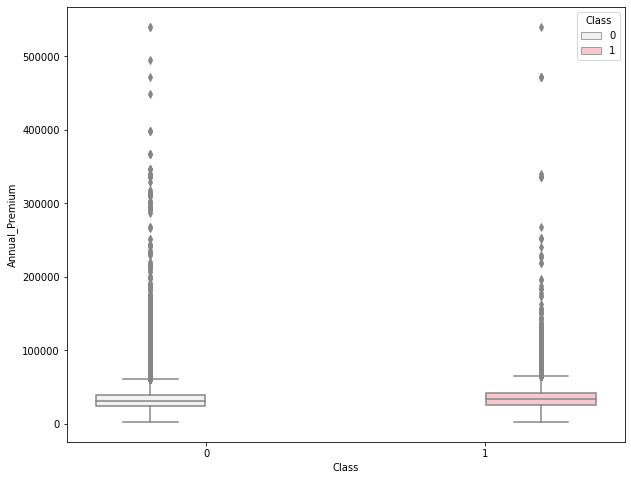

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))

for i, v in enumerate(num_data):
    if(v == 'LoanStatus'):
        continue
    sns.boxplot(data=myNewData, ax=ax, x='Class', y=v, hue='Class', color='pink')
    ax.set(xlabel='Class', ylabel=v)

It seems that `Annual_Premium` does not have a significant relationship to `Class` as the boxes of 0 and 1 do not have a significant difference between them. The boxplot is constructed based on the interquarile range score (IQR), and anything below 1/5 IQR below Q1 or more than 1.5 IQR above Q3 are considered as outliers. However, `Annual_Premium` would only have natural outliers, which means these outliers are not a result of measurement error. Non-natural outliers are outliers resulted by measurement error, such as a measurement for the temperature. Hence, these natural outliers should not be dropped as they can reflect the true conditions of the company sales. Therefore, there will not be dropping of outliers.

# Data Preprocessing

## Null Value Check

Checking for missing values.

In [59]:
myNewData.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Class                   0
dtype: int64

As stated previously, there is no missing values in this dataset, so no further processing will be needed.

## Data Encoding

Changing words to numbers because the computer can only understand numbers.

### Label Encoding

This approach is to give a label to the string data. In this project, label encoding is be used for binary features that are of the `object` type, which are `Gender` and `Vehicle_Damage`. These feature columns are renamed in such a way that **0 is false and 1 is true** for the column to replicate the effect of one-hot encoding. The reason of not directly applying one-hot encoding to these columns is because it is quite redundant to do so, since the columns are already binary and very close to the form of one-hot encoding.

In [60]:
# Define features to be processed with label encoding
label_data = ['Gender', 'Vehicle_Damage']

# Instantiate encoder
label_encoder = LabelEncoder()

# Process columns
for _, v in enumerate(label_data):
    myNewData[v] = label_encoder.fit_transform(myNewData[v])

# Rename feature for easier understanding
myNewData2 = myNewData.rename(columns={'Gender': 'Male'}) # Vehicle_Damage is already a good name
myNewData2

,Male,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Class
110688,0,41,1,28,1,1-2 Year,0,48034,26,0
345988,1,25,1,15,1,< 1 Year,0,43901,152,0
209585,1,26,1,29,1,< 1 Year,0,26479,152,0
71693,0,25,1,21,1,< 1 Year,0,30846,152,0
186827,0,25,1,41,0,< 1 Year,1,37267,152,1
...,...,...,...,...,...,...,...,...,...,...
95808,1,48,1,28,0,1-2 Year,1,2630,157,0
359198,0,44,1,30,0,1-2 Year,1,21679,124,0
152600,1,33,1,38,0,1-2 Year,1,30811,26,0
368483,1,20,1,39,0,< 1 Year,1,2630,160,0


### One-Hot Encoding

The `Vehicle_Age` feature will be encoded using one-hot encoding. This means that each unique data will be a new binary feature. This is to avoid biasness in models such as KNN that might rank a nominal data. Since each unique value in the column will be transformed into a new feature, **one feature can be dropped because if all other related features are false**, the value must be the last feature. Hence, to avoid multicollinearity and redundancy, the `drop='first'` parameter is used to remove the first column of the categories.

In [61]:
# Define columns to be processed
onehot_data = ['Vehicle_Age']

myNewData3 = myNewData2

# Instantiate encoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')

# Process columns
for _, v in enumerate(onehot_data):
    tmp = onehot_encoder.fit_transform(np.reshape(myNewData2[v].values, (-1, 1)))
    
    # Join returned array to dataframe
    categories = onehot_encoder.categories_[0][1:]
    myNewData3[categories] = tmp

    # Drop the original feature
    myNewData3 = myNewData3.drop(columns=[v])
    
    # Rename new derived features fpr easier processing
    for _, w in enumerate(categories):
        myNewData3 = myNewData3.rename(columns={w: v + "_" + w})

myNewData3

,Male,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Class,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
110688,0,41,1,28,1,0,48034,26,0,0.0,0.0
345988,1,25,1,15,1,0,43901,152,0,1.0,0.0
209585,1,26,1,29,1,0,26479,152,0,1.0,0.0
71693,0,25,1,21,1,0,30846,152,0,1.0,0.0
186827,0,25,1,41,0,1,37267,152,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95808,1,48,1,28,0,1,2630,157,0,0.0,0.0
359198,0,44,1,30,0,1,21679,124,0,0.0,0.0
152600,1,33,1,38,0,1,30811,26,0,0.0,0.0
368483,1,20,1,39,0,1,2630,160,0,1.0,0.0


In [62]:
myNewData3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343939 entries, 110688 to 201511
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Male                   343939 non-null  int64  
 1   Age                    343939 non-null  int64  
 2   Driving_License        343939 non-null  int64  
 3   Region_Code            343939 non-null  int64  
 4   Previously_Insured     343939 non-null  int64  
 5   Vehicle_Damage         343939 non-null  int64  
 6   Annual_Premium         343939 non-null  int64  
 7   Policy_Sales_Channel   343939 non-null  int64  
 8   Class                  343939 non-null  int64  
 9   Vehicle_Age_< 1 Year   343939 non-null  float64
 10  Vehicle_Age_> 2 Years  343939 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 39.6 MB


After encoding, all of the data is in numbers.

## Column Dropping

Dropping columns to avoid multicollinearity. Multicollinearity is when two or more features are highly correlated with one another. This effect might reduce the reliability in determining the effect of each independent feature on the target variable (`Class`), making it hard to interpret the model. A correlation matrix is computed and a heatmap is used to visualise the results.

<AxesSubplot:title={'center':'Heatmap for Correlation Matrix on Dataset'}>

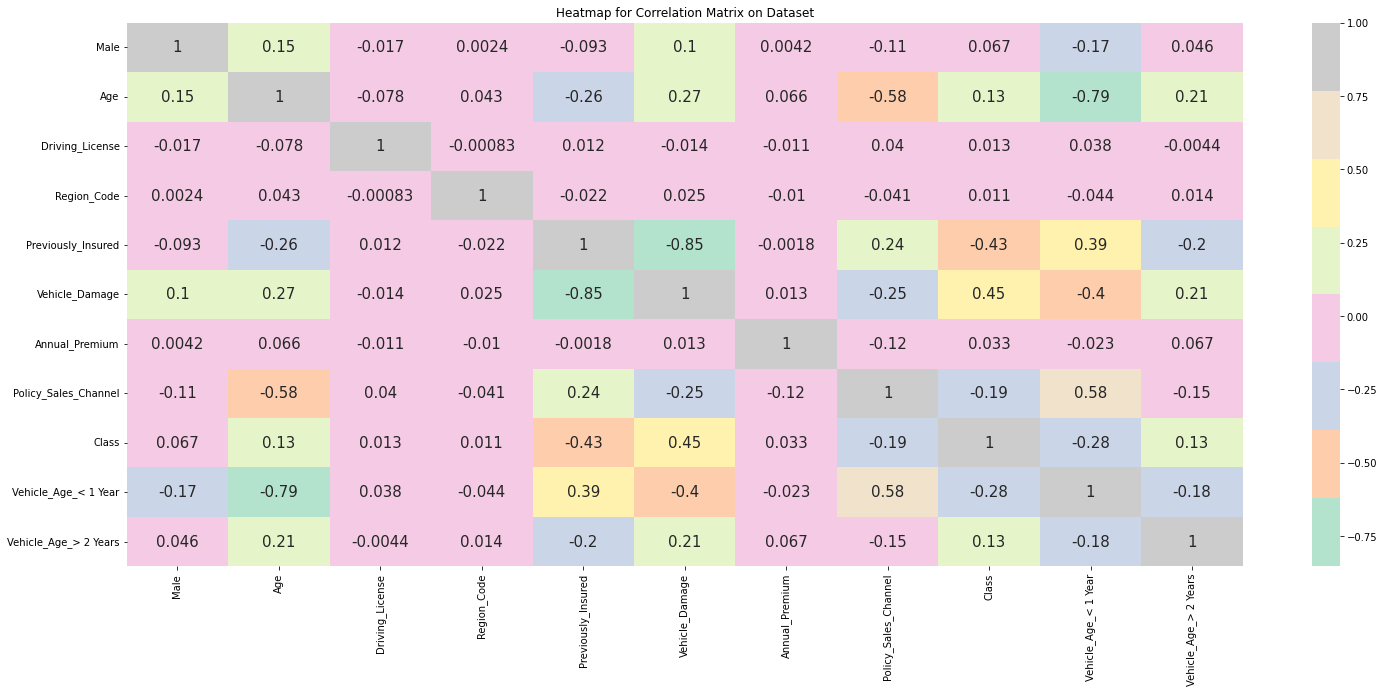

In [63]:
plt.figure(figsize=(25, 10))
plt.title('Heatmap for Correlation Matrix on Dataset')
cor = myNewData3.corr()
sns.heatmap(cor, cmap='Pastel2', annot=True, annot_kws={'size': 15})

From the heatmap, is it known that `Previously_Insured`, `Vehicle_Damage` and `Vehicle_Age` derived features have a higher correlation to the `Class` target. To avoid overfitting, only these features with a correlation higher than or equal to absolute 0.1 will be used to train the models.

In [64]:
# Get the correlation of the feature with the target variable
cor_target = abs(cor['Class'])

# Select highly correlated features
relevant_features = cor_target[cor_target >= 0.1]
relevant_features

Age                      0.133641
Previously_Insured       0.431100
Vehicle_Damage           0.448492
Policy_Sales_Channel     0.185005
Class                    1.000000
Vehicle_Age_< 1 Year     0.280885
Vehicle_Age_> 2 Years    0.132574
Name: Class, dtype: float64

Only the features above are selected to train the model.

In [65]:
# Convert to dataframe
cor_df = pd.DataFrame(relevant_features)

# Transpose columns and rows
cor_df = cor_df.T
relevant_features = cor_df.columns.values

myNewData4 = myNewData3[relevant_features]
myNewData4

,Age,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Class,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
110688,41,1,0,26,0,0.0,0.0
345988,25,1,0,152,0,1.0,0.0
209585,26,1,0,152,0,1.0,0.0
71693,25,1,0,152,0,1.0,0.0
186827,25,0,1,152,1,1.0,0.0
...,...,...,...,...,...,...,...
95808,48,0,1,157,0,0.0,0.0
359198,44,0,1,124,0,0.0,0.0
152600,33,0,1,26,0,0.0,0.0
368483,20,0,1,160,0,1.0,0.0


In [66]:
# Rename df
df = myNewData4

In [67]:
df.describe()

,Age,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Class,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
count,343939.000000,343939.000000,343939.000000,343939.000000,343939.000000,343939.000000,343939.000000
mean,38.545201,0.488822,0.480879,111.958865,0.163924,0.435353,0.041033
std,15.227192,0.499876,0.499635,54.275860,0.370208,0.495804,0.198368
min,20.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,26.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,0.000000,145.000000,0.000000,0.000000,0.000000
75%,49.000000,1.000000,1.000000,152.000000,0.000000,1.000000,0.000000
max,85.000000,1.000000,1.000000,163.000000,1.000000,1.000000,1.000000


## Data Splitting

Splitting of features and target label. The dataset has already been randomised earlier on. Split dataset into training and test sets using the 70:30 ratio for training:testing. Due to computer resources constraint, only 5000 records will be used.

In [68]:
X_df = df.drop('Class', axis=1)
X_df = X_df[:5000]
y_df = df['Class']
y_df = y_df[:5000]

# Split 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size = 0.3)

## Data Scaling
As per the `Data Description` section, data scaling is much needed for this dataset.
<br />
<br />
Algorithms based on gradient descent such as **linear regression** and **neural network** perform better with scaled data because the data values will affect the step size of the gradient descent. The gradient descent will converge more quickly towards the minima when using data on a similar scale. 
<br />
<br />
Distance-based algorithms such as **KNN** and **SVM** are most affected by the range of data values as they calculate the distances between data points to find the similarity. The algorithms will stress more on features with data of a higher value, causing the model to be biased.
<br />
<br />
**Tree-based algorithms** are quite insensitive to the data scales because the tree splits on a feature without taking other features into consideration.

### Normalisation

There are two main scaling techinques, that are **normalisation** and **standardisation**. Normalisation will transform all values to fit in the range of 0 and 1, also known as min-max scaling. Standardisation turns the mean value into 0 and the other values centred around the mean value will have a unit standard deviation. There is no particular range to this scaling method.
<br />
<br />
Normalisation is used when the data distribution does not follow a Gaussian distribution, especially for KNN and neural networks, but it is very prone to outliers. Standardisation is helpful when the data follows a Gaussian distribution, but it is not necessarily so. Outliers in the data will not be affected by standardisation. The mean and standard deviation will be rescaled in such a way that they are very close to 0 and 1 respectively.
<br />
<br />
In this case, the dataset will be standardised using the `MinMaxScaler` because this dataset does not have any non-natural outliers. Besides, it is easier to implement because most of the features are binary of data value 0 or 1. Scaling the data to fit a range between 0 and 1 is more logical.

In [69]:
# Define scaler
scaler = MinMaxScaler()

# Fit and transform
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.46774194, 0.        , 1.        , 0.15432099, 0.        ,
        0.        ],
       [0.27419355, 0.        , 1.        , 0.74691358, 0.        ,
        0.        ],
       [0.59677419, 0.        , 1.        , 0.15432099, 0.        ,
        0.        ],
       ...,
       [0.58064516, 1.        , 0.        , 0.75925926, 0.        ,
        0.        ],
       [0.88709677, 0.        , 1.        , 0.15432099, 0.        ,
        0.        ],
       [0.06451613, 1.        , 0.        , 0.93209877, 1.        ,
        0.        ]])

# Model Selection

First of all, this is a classification problem as the goal is to predict whether the customer is interested in a vehicle insurance, which means the model is required to classify the applicant into `Class` 0 or 1, where 0 = not interested and 1 = interested.
<br />
<br />
Therefore, the models that will be trained and evaluated for comparison are k neighbour classifier, decision tree classififer and support vector machine.

In [70]:
def predict(model, X_train, X_test, y_train, y_test):
    # Train model
    model.fit(X_train, y_train)

    # Make training data prediction
    pred = model.predict(X_train)

    # Calculate training data accuracy
    train_acc = accuracy_score(y_train, pred)
    print("Training Accuracy:", train_acc)

    # Make prediction
    pred = model.predict(X_test)

    # Test accuracy
    test_acc = accuracy_score(y_test, pred)
    print("Testing Accuracy:", test_acc)

    # Confusion Matrix
    conf_matr = confusion_matrix(y_test, pred, labels=model.classes_)
    
    # Visualise confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels=model.classes_)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()

    # Show classification report
    class_report = classification_report(y_test, pred, output_dict=True)
    print("Classification Report:\n", classification_report(y_test, pred))

    return train_acc, test_acc, conf_matr, class_report 

The above is a reusable function for all models.

## K Neighbour Classifier

KNN is a very simple model that can sometimes outperform complex mdels such as ANNs and SVMs. It basically utilises the distance between two data points. There will be a circle of data points, and one data point is compared to the other data points. The closest data points will be grouped together. The typical K value to start with is 3.

### First Round

In [71]:
def first_round(model):
     return predict(model, X_train[:1000], X_test[:1000], y_train[:1000], y_test[:1000])

Training Accuracy: 0.896
Testing Accuracy: 0.828


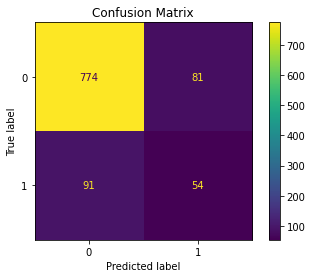

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       855
           1       0.40      0.37      0.39       145

    accuracy                           0.83      1000
   macro avg       0.65      0.64      0.64      1000
weighted avg       0.82      0.83      0.83      1000



In [72]:
# Instantiate model
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_train_acc, knn_acc, knn_cm, knn_cr = first_round(knn_model)

The training accuracy of the KNN model is higher than the testing accuracy at the first round, which indicates that the model is overfitting. Therefore, grid search is used to tackle this overfitting problem.

### Grid Search

Finding the best K value and weights for KNN to improve the model performance.

In [74]:
# Grid Search function
def grid_search(params, model):
    gs = GridSearchCV(
        model,
        param_grid=params,
        verbose=1
    )

    # Take only the first 1000 records
    gs_results = gs.fit(X_train[:1000], y_train[:1000])

    print("Best Score:", gs_results.best_score_)
    print("Best Estimator:", gs_results.best_estimator_)
    print("Best Params:", gs_results.best_params_)

In [75]:
# Define parameters
params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

grid_search(params, KNeighborsClassifier())

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Score: 0.8400000000000001
Best Estimator: KNeighborsClassifier(n_neighbors=3)
Best Params: {'n_neighbors': 3, 'weights': 'uniform'}


From the grid search conducted above, the best cross-validated score of the best estimator is shown. The K value is also shown here with the suitable `weights`.

### Fine-tuning

Using the grid search results above, another KNN model is instantiated and trained.

Training Accuracy: 0.8714285714285714
Testing Accuracy: 0.8266666666666667


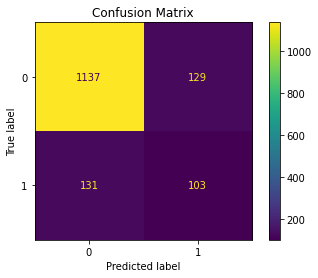

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1266
           1       0.44      0.44      0.44       234

    accuracy                           0.83      1500
   macro avg       0.67      0.67      0.67      1500
weighted avg       0.83      0.83      0.83      1500



In [76]:
# Instantiate model
knn_model = KNeighborsClassifier(n_neighbors=3, weights='uniform')

knn_train_acc, knn_acc, knn_cm, knn_cr = predict(knn_model, X_train, X_test, y_train, y_test)

Generally, the performance of the model is not good as it still tends to overfit the data. It is good at identifying non-interested customers, as shown in the confusion matrix. However, it is known that the model misclassifies almost half of the interested customers as not interested in vehicle insurance.

## Decision Tree Classifier

A decision tree basically works by splitting a node when it evaluates on an attribute. Each branch is the outcome of the test and each leaf node represents the class label.

### First Round

Training Accuracy: 0.937
Testing Accuracy: 0.827


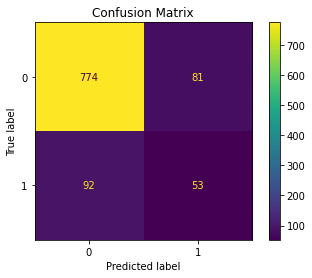

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       855
           1       0.40      0.37      0.38       145

    accuracy                           0.83      1000
   macro avg       0.64      0.64      0.64      1000
weighted avg       0.82      0.83      0.82      1000



In [77]:
# Instantiate the model
tree_model = DecisionTreeClassifier()

tree_train_acc, tree_acc, tree_cm, tree_cr = first_round(tree_model)

The training accuracy of the tree model is much higher than the testing accuracy at the first round, which indicates that the model is overfitting. Therefore, grid search is used to tackle this overfitting problem.

### Grid Search

The `max_depth` of the tree needs to be limited for a better performance. There should also be a `min_samples_leaf` for each leaf to avoid overfitting.

In [78]:
# Define parameters
params = {'max_depth': [x for x in range(3, 11)], 'min_samples_leaf': [x for x in range(1, 10, 3)]}

grid_search(params, DecisionTreeClassifier())

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Score: 0.859
Best Estimator: DecisionTreeClassifier(max_depth=6, min_samples_leaf=4)
Best Params: {'max_depth': 6, 'min_samples_leaf': 4}


From the grid search conducted above, the best cross-validated score of the best estimator is shown. It is known the best `max_depth` for the decision tree is 3.

### Fine-tuning

Fine-tuning the tree model using the parameters above.

Training Accuracy: 0.8431428571428572
Testing Accuracy: 0.8373333333333334


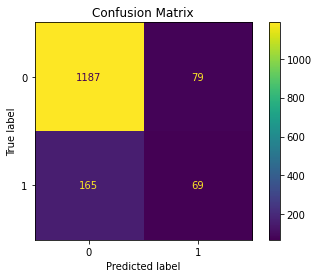

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1266
           1       0.47      0.29      0.36       234

    accuracy                           0.84      1500
   macro avg       0.67      0.62      0.63      1500
weighted avg       0.81      0.84      0.82      1500



In [79]:
tree_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=4)

tree_train_acc, tree_acc, tree_cm, tree_cr = predict(tree_model, X_train, X_test, y_train, y_test)

Generally, the performance of the tree model is also not good as it still tends to overfit the data by a little. Looking at its precision and recall for label 1, its performance for classifying interested customers has decreased a bit.

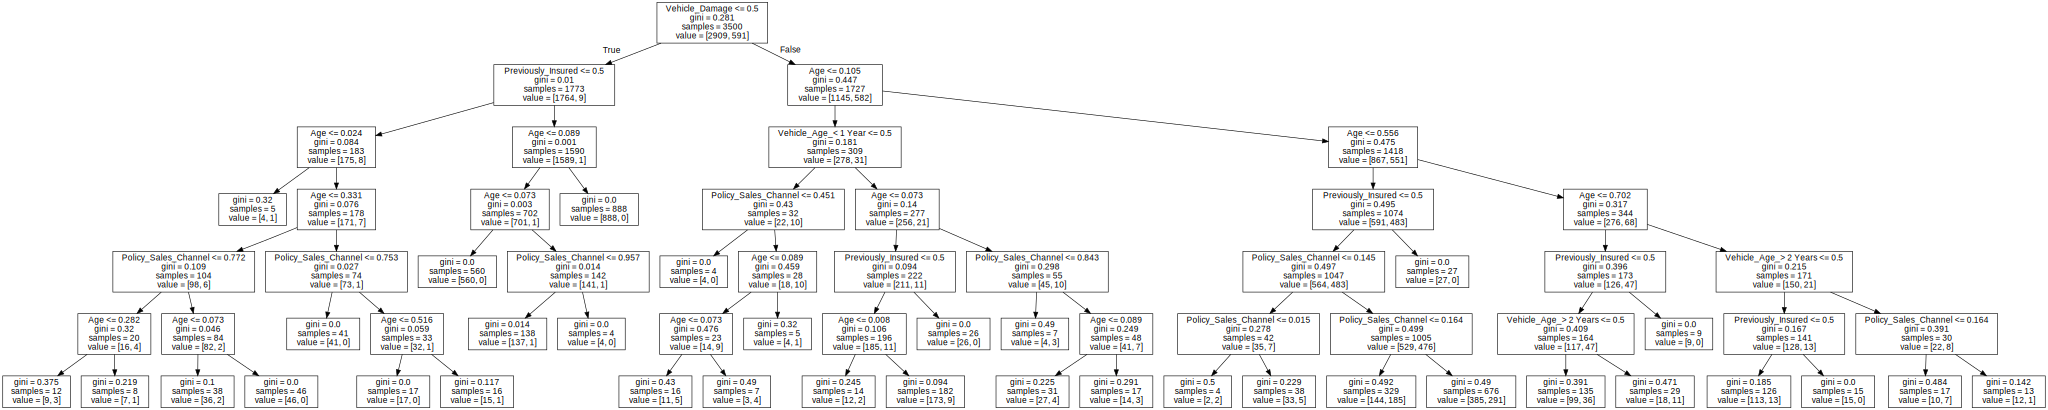

In [80]:
dot_data = export_graphviz(tree_model, feature_names=X_df.columns.tolist())
graph = graphviz.Source(dot_data)
graph

The above is the visualisation of the decision tree.

## Support Vector Machines

The model classifies data by using the best hyper plane that separates two data classes, utilising the  margin from the plane to the data point.

### First Round

Training Accuracy: 0.851
Testing Accuracy: 0.855


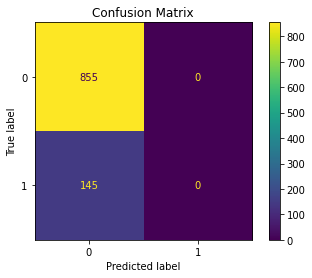

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       855
           1       0.00      0.00      0.00       145

    accuracy                           0.85      1000
   macro avg       0.43      0.50      0.46      1000
weighted avg       0.73      0.85      0.79      1000



In [81]:
# Instantiate model
svm_model = SVC(kernel='rbf', C=1)

# Predict
svm_train_acc, svm_acc, svm_cm, svm_cr = first_round(svm_model)

The SVM model is unable to correctly classify interested customers at all as evidently shown by the 0 precision and recall score for label 1. It needs to be fine-tuned.

### Grid Search

Finding the best kernel, C and gamma values.

In [82]:
# Define parameters
params = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid_search(params, SVC())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Score: 0.8560000000000001
Best Estimator: SVC(C=100, gamma=1)
Best Params: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


From the grid search conducted above, the best cross-validated score of the best estimator is shown. The C and gamma value are also shown here with the suitable kernel.

### Fine-tuning

Fune-tuning the model using the parameters above.

Training Accuracy: 0.8345714285714285
Testing Accuracy: 0.8473333333333334


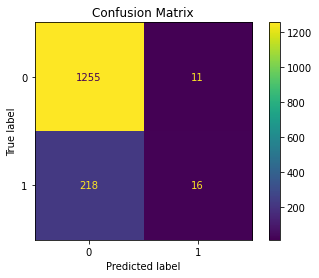

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      1266
           1       0.59      0.07      0.12       234

    accuracy                           0.85      1500
   macro avg       0.72      0.53      0.52      1500
weighted avg       0.81      0.85      0.79      1500



In [83]:
# Instantiate model
svm_model = SVC(kernel='rbf', C=100, gamma=1)

# Predict
svm_train_acc, svm_acc, svm_cm, svm_cr = predict(svm_model, X_train, X_test, y_train, y_test)

Although the accuracy score for the SVM model decreased, it actually improved by being able to identify some of the interested customers.

# Evaluation

Evaluating the models using pointplot.

In [86]:
y = {
    'accuracy': [knn_acc, tree_acc, svm_acc],
    'precision': [knn_cr['1']['precision'], tree_cr['1']['precision'], svm_cr['1']['precision']],
    'recall': [knn_cr['1']['recall'], tree_cr['1']['recall'], svm_cr['1']['recall']],
    'models': ['knn', 'tree', 'svm']
}

y = pd.DataFrame(y)
y

,accuracy,precision,recall,models
0,0.826667,0.443966,0.440171,knn
1,0.837333,0.466216,0.294872,tree
2,0.847333,0.592593,0.068376,svm


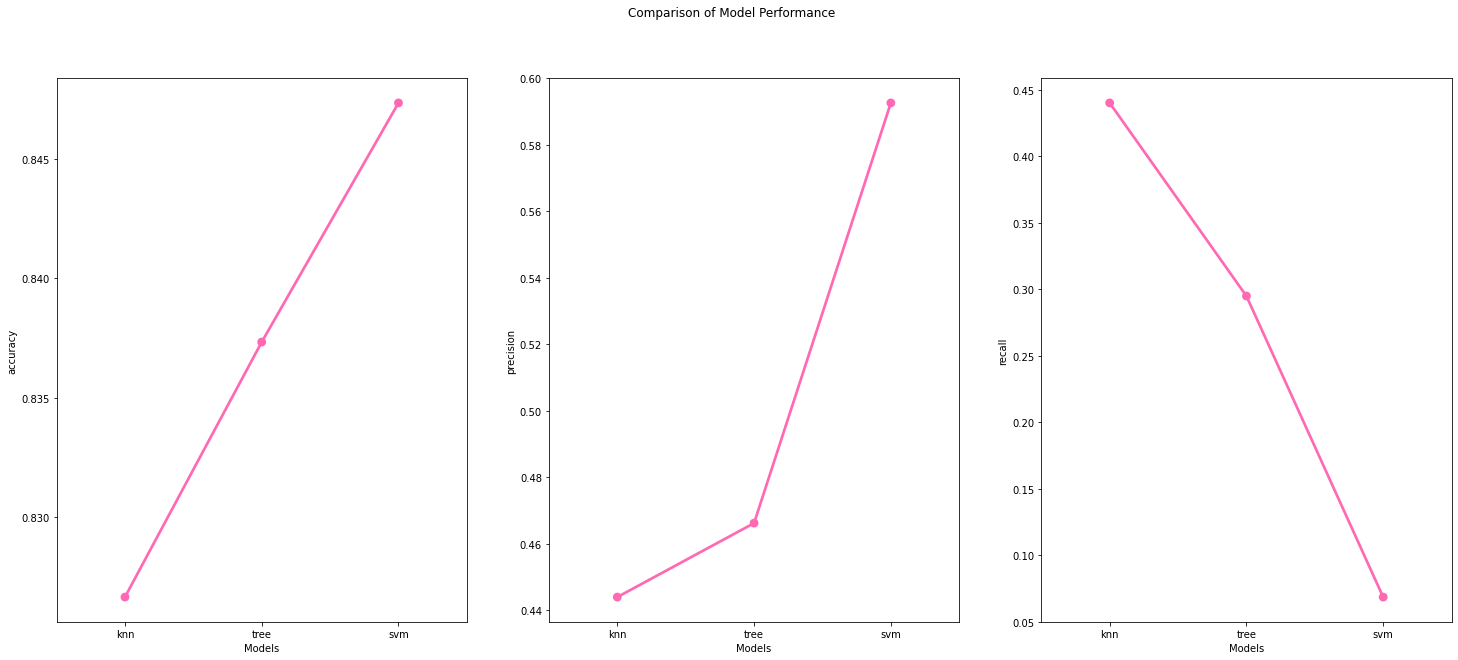

In [87]:
fig, ax = plt.subplots(1, 3, figsize=(25, 10))
ax = ax.flatten()

fig.suptitle('Comparison of Model Performance')

for i, v in enumerate(y):
    if(v == 'models'):
        break
    sns.pointplot(data=y, ax=ax[i], x=y['models'], y=y[v], color='hotpink')
    ax[i].set(xlabel='Models', ylabel=v)

As shown in the graph, the testing accuracy and precision of SVM is the highest, with KNN being the lowest. However, the KNN outperforms other models in terms of recall. Before a suitable model is selected, let us revisit the objective of this project. The objective of this project is to classify customers whether they are interested in purchasing a vehicle insurance, so a high accuracy alone does not mean a lot. A high accuracy at most shows that the models are good at finding uninterested customers.

In this case, the positive (1) refers to an interested customer, and the negative (0) refers to an uninterested customer.

1. A true positive is an interested customer being classified correctly as an interested customer.
2. A false positive is when an uninterested customer is classified as an interested customer.
3. A true negative is a uninterested customer being classified correctly as an uninterested customer.
4. A false negative is a interested customer being classified as a uninterested customer.

Out of the four cases above, other than correctly classifying the customers (which gives a **high accuracy**), it is better for the model to classify interested customers as uninterested customers (which gives a high **false negative**). Because classifying uninterested customers as interested customers (which gives a **high false positive**) might lead the company to launch a new vehicle insurance, only to find out that the demand is not as high as expected, causing them to lose revenue and profit. Therefore, **false negatives should be higher than the false positives.**

A high precision means that out of the total actual positives, the model got it correct most of the time (high true positive). Recall is higher means that out of all the total positives predicted, it has high true positive. Following the logic that false negatives should be more than false positives, due to the formulae of precision and recall, a lower false positive will give **a higher precision**, and a higher false negative will give **a lower recall**.

The model that satisfies a higher precision, lower recall and good accuracy is the SVM model. Therefore, the ideal model to be selected is the **support vector machine**, for a more conservative prediction and estimation of demand for the new vehicle insurance package.